In [9]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [10]:
import pandas as pd
location=r'DPD__All_Crime_Incidents__December_6__2016_-_Present.csv'
ml = pd.read_csv(location)
ml= ml.iloc[:,4:21]
ml= ml.drop(['Charge Description','Incident Time (24h)','State Offense Code', 'Incident Date & Time','Arrest Charge','Zip Code','Year','Scout Car Area','Precinct Number','Neighborhood','Council District','Census Block GEOID'], axis=1)
ml = ml.dropna()
y= ml.iloc[:,0]
x=ml.iloc[:,1:5]
#print(x)

db_x= x.iloc[:,2:4]
db_x=db_x[:13000]
db_y=y[:13000]
#print(db_y)
df = db_x.values

#print(df)

db = DBSCAN(eps=5, min_samples=10).fit(df)
core_samples = db.core_sample_indices_
labels = db.labels_
labels=np.asarray(labels)
#print(type(labels))
a=np.where(labels==0)
a = np.array(a)
a= a.flatten()
a = a.tolist()
#print(type(a))

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

#dataset = pd.DataFrame({'Lat': x_data_plot, 'Long':y_data_plot}, columns=['Lat', 'Long'])


#ds = pd.DataFrame({'labels': labels}, columns=['Labels'])
#print(ds)
d= pd.concat([db_x, db_y], axis=1)

#i=0
#print(a[1])
#print(d.iloc[a[1],:])
data = []

for i in range(0,len(a)):
    data.append(d.iloc[a[i],:])

data = pd.concat(data, axis=1).T
    
dat= data.iloc[:,2]

dat1= data.drop(['Offense Category'],axis=1)

#print(dat1)

C:\Users\Geethanzali\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


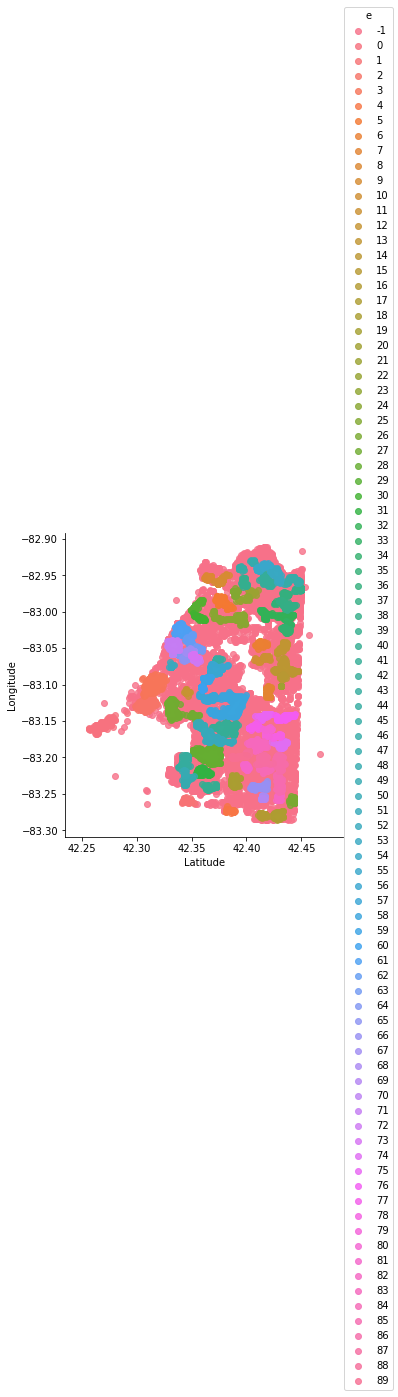

In [11]:
import hdbscan
from sklearn.model_selection import train_test_split
import seaborn as sns

#X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=1)

#print(X_train)
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, prediction_data=True).fit(dat1)
pal = sns.color_palette('deep', 8)
dat1['e'] = clusterer.labels_

#print(X_train)

lm= sns.lmplot( x="Latitude", y="Longitude", data=dat1, fit_reg=False, hue="e")


In [12]:
dat1= pd.concat([dat1,dat], axis=1)


df2 = pd.DataFrame(clusterer.labels_, columns=['labels'])
df2= df2.values
df2 = np.asarray(df2)
#print(df2)
#a=np.where(df2==0)
df2= df2.flatten()
df2 = df2.tolist()


In [30]:
from collections import Counter

def func(group):
    
    
    pos=[]
    
    for position, item in enumerate(df2):
        if item == group:
            pos.append(position)
    
    
    data = []
    
    for i in range(0,len(pos)):
        data.append(dat1.iloc[pos[i],:])
        
    data = pd.concat(data, axis=1).T
    Num_offense= offence_type= data['Offense Category'].unique()
    
    
    Total_crimes= print( 'Total number of crimes occured in this area: ',len(data))
    Num_off= print( 'Number of types of offense occured in this area: ',len(Num_offense))
    
    num_offence_type= Counter(data['Offense Category'])
    dff = pd.DataFrame.from_dict(num_offence_type,orient='index')
    dff = dff.rename(columns={'index':'Offence type', 0:'count'})
    f= dff.sort_values(by='count', ascending=False)
    
    Crime= print( 'Beware of crime: ',f.index[0])
    numof = print('Number of times',f.index[0],'has occured is',f.iloc[0,:][0])
    
    
    
    return [None]



In [34]:
func(-1)

Total number of crimes occured in this area:  7112
Number of types of offense occured in this area:  28
Beware of crime:  LARCENY
Number of times LARCENY has occured is 1198


[None]